In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [53]:
plt.style.use('seaborn')

# Data preparation

In [100]:
mean_01 = np.array([1,2])
cov_01 = np.array([[1,0.1], [0.1,1.2]])

mean_02 = np.array([5,6])
cov_02 = np.array([[1.21,0.1], [0.1,1.3]])

#Normal Distribution

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)


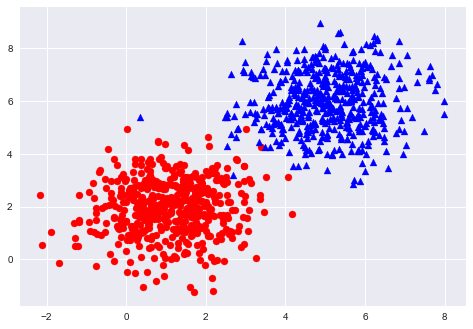

In [101]:
plt.figure(0)

plt.scatter(dist_01[:,0], dist_01[:,1], color='r')
plt.scatter(dist_02[:,0], dist_02[:,1], color='b', marker = '^')

plt.show()

In [102]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [103]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [104]:
np.random.shuffle(data)
print(data[:5])

[[0.52198709 0.80878672 0.        ]
 [3.37286677 6.96984092 1.        ]
 [4.30995562 6.40703405 1.        ]
 [2.44615491 1.65810099 0.        ]
 [0.94350572 1.90589202 0.        ]]


In [105]:
split = int(0.8*data.shape[0])

In [106]:
X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression Function

In [107]:
def hypothesis(x, w, b):
    h = np.dot(x,w) + b
    return sigmoid(h)

In [108]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [109]:
def error(y_true, x, w, b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
        
    return -err/m
    

In [110]:
def get_grads(y_true, x, w, b):
    
    m = x.shape[0]
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w, grad_b]


def grad_descent(x, y_true, w, b, learning_rate=0.1):
    
    err = error(y_true, x, w, b)
    [grad_w, grad_b] = get_grads(y_true, x, w, b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err, w, b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]    

In [111]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [112]:
for i in range(100):
    l,W,b = grad_descent(X_train, Y_train,W,b,learning_rate=0.1) 
    acc.append(get_acc(X_test, Y_test, W, b))
    loss.append(l)

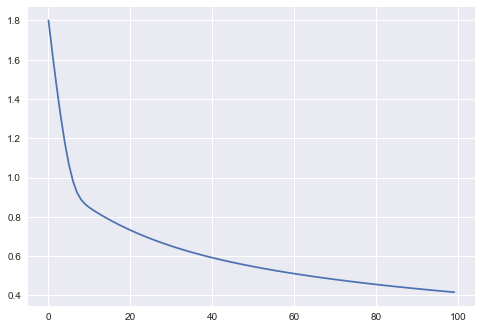

In [113]:
plt.plot(loss)
plt.show()

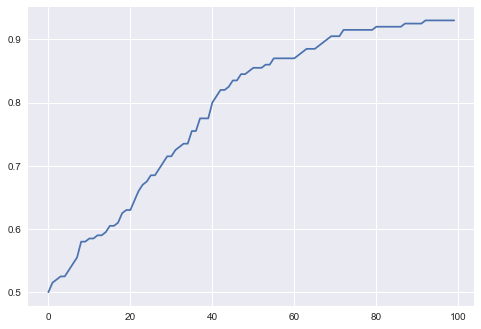

0.93


In [114]:
plt.plot(acc)
plt.show()
print(acc[-1])

# #Decision Boundary

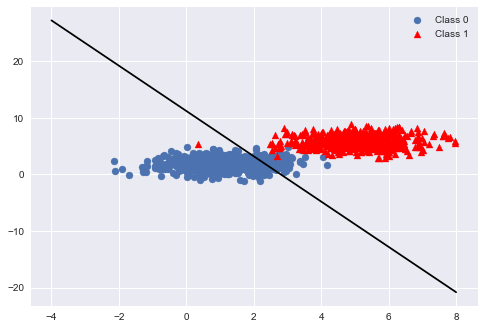

In [115]:

plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [116]:
print(W)
print(b)

[0.56908833 0.14201309]
-1.5944198235354774
